In [32]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [33]:
import os
import tarfile
import urllib.request
import pandas as pd
import math

#data Path setting
HOUSING_PATH = os.path.join("datasets", "google")

def load_app_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "googleplaystore.csv")
    return pd.read_csv(csv_path)
apps = load_app_data()
apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [34]:
apps.dropna(axis=0, inplace=True)
apps.drop_duplicates(["App"], inplace=True)
apps.reset_index(drop=True, inplace=True)
apps.rename(columns={'Content Rating':'ContentRating'}, inplace=True)

apps["Rating"] = pd.to_numeric(apps["Rating"])
apps["Reviews"] = pd.to_numeric(apps["Reviews"])
apps["Size"] = apps["Size"].str.replace(pat=r'M', repl=r'', regex=True)
apps["Size"] = apps["Size"].str.replace(pat=r'k', repl=r'', regex=True)
apps["Size"] = apps["Size"].str.replace(pat=r'Varies with device', repl=r'0', regex=True)
apps["Size"] = pd.to_numeric(apps["Size"])
apps["Installs"] = apps["Installs"].str.replace(pat=r'+', repl=r'', regex=True)
apps["Installs"] = apps["Installs"].str.replace(pat=r',', repl=r'', regex=True)
apps["Installs"] = pd.to_numeric(apps["Installs"])
apps["Price"] = apps["Price"].str.replace(pat=r'$', repl=r'', regex=True)
apps["Price"] = pd.to_numeric(apps["Price"])

In [35]:
apps=apps.assign(RIR=lambda apps: apps.Reviews/apps.Installs)

In [36]:
apps["App"].value_counts(ascending=False)

Ring                                               1
the Egg - crack the egg                            1
Clash of Clans                                     1
Power Spheres by BoBoiBoy                          1
Skip-Bo™ Free                                      1
                                                  ..
Trimble Ag Mobile                                  1
EURES - Your Job in Europe                         1
iLocker X - iOS11 Lockscreen with HD Wallpapers    1
Picktrainer: India's largest photo contest app     1
Kids Mode                                          1
Name: App, Length: 8190, dtype: int64

In [37]:
apps["Category"].value_counts()

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [38]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            8190 non-null   object 
 1   Category       8190 non-null   object 
 2   Rating         8190 non-null   float64
 3   Reviews        8190 non-null   int64  
 4   Size           8190 non-null   float64
 5   Installs       8190 non-null   int64  
 6   Type           8190 non-null   object 
 7   Price          8190 non-null   float64
 8   ContentRating  8190 non-null   object 
 9   Genres         8190 non-null   object 
 10  Last Updated   8190 non-null   object 
 11  Current Ver    8190 non-null   object 
 12  Android Ver    8190 non-null   object 
 13  RIR            8190 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 895.9+ KB


In [39]:
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Current Ver,Android Ver,RIR
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.015900
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.001934
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.017502
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.004313
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.009670


In [40]:
apps["rating_cat"] = pd.cut(apps["Rating"],
                               bins=[0, 1, 2, 3, 4, 5],
                               labels=[0, 1, 2, 3, 4])

In [41]:
#트레이닝셋, 테스트셋 구분
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(apps, apps["rating_cat"]):
    strat_train_set = apps.loc[train_index]
    strat_test_set = apps.loc[test_index]

In [42]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("rating_cat", axis=1, inplace=True)

In [43]:
apps_test = strat_test_set.copy()

In [44]:
corr_matrix = apps.corrwith(apps_train["Rating"])
corr_matrix.sort_values(ascending=False)

NameError: name 'apps_train' is not defined

그림 저장: scatter_matrix_plot


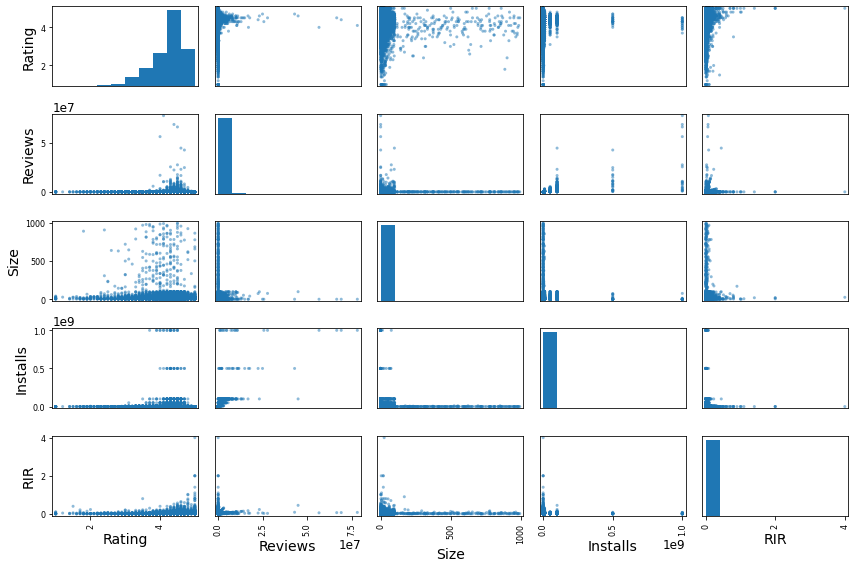

In [45]:
from pandas.plotting import scatter_matrix

attributes = ["Rating", "Reviews", "Size",
              "Installs", "RIR"]
scatter_matrix(apps[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

그림 저장: scatter_plot


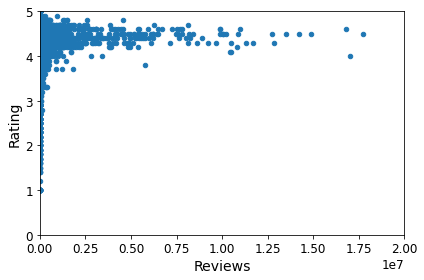

In [46]:
apps.plot(kind="scatter", x="Reviews", y="Rating",
             alpha=1)
plt.axis([0, 20000000, 0, 5])
save_fig("scatter_plot")

In [47]:
apps.loc[apps["App"] == "ROBLOX",["Reviews","Rating"]].iloc[0]

Reviews    4447388.0
Rating           4.5
Name: 1273, dtype: float64

그림 저장: scatterplot


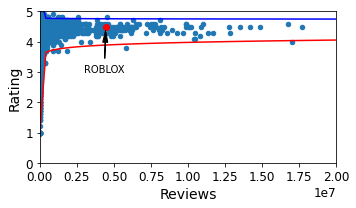

In [48]:
apps.plot(kind='scatter', x="Reviews", y='Rating', figsize=(5,3))
plt.axis([0, 20000000, 0, 5])
position_text = {
    "ROBLOX": (3000000, 3.),
}
for app, pos_text in position_text.items():
    pos_data_x, pos_data_y = apps.loc[apps["App"] == "ROBLOX",["Reviews","Rating"]].iloc[0]
    plt.annotate(app, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("Reviews")
save_fig('scatterplot')
x1=np.linspace(0, 20000000)
y1=np.exp(x1**0.02)
plt.plot(x1, y1, "r")
x2=np.linspace(0, 20000000)
y2=np.exp(-x2**0.02)+4.5
plt.plot(x2, y2, "b")
plt.show()

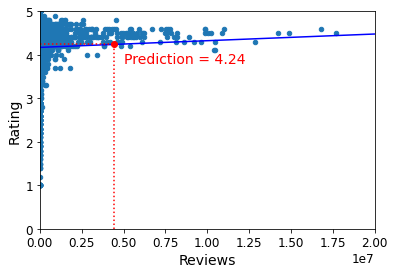

In [49]:
from sklearn import linear_model

X = np.c_[strat_train_set["Reviews"]]
y = np.c_[strat_train_set["Rating"]]

# Visualize the data
strat_train_set.plot(kind='scatter', x="Reviews", y='Rating')
plt.axis([0, 20000000, 0, 5])

# Select a linear model
model = linear_model.LinearRegression()

# Train the model
model.fit(X, y)

t0, t1 = model.intercept_[0], model.coef_[0][0]

line=np.linspace(0, 20000000, 1000)
plt.plot(line, t0 + t1*line, "b")

# Make a prediction
x_test = 4447388.0
X_test = [[x_test]]
Y_test = model.predict(X_test)
y_test = model.predict(X_test)[0][0]
plt.plot(X_test, Y_test, "ro")
plt.plot([x_test, x_test],[0, y_test], "r:")
plt.plot([0, x_test],[y_test, y_test], "r:")
plt.text(5000000, 3.8, r"Prediction = "+str(round(y_test,2)), fontsize=14, color="r")
plt.show()

In [50]:
y_predict = model.predict(np.array(apps_test["Reviews"]).reshape(-1,1))
y_predict = y_predict.reshape(len(y_predict))
y_answer = np.array(apps_test["Rating"])
print("Evaluate(MSE) : {}".format(np.average((y_predict-y_answer)**2)))

Evaluate(MSE) : 0.2794384208734363


In [51]:
import sklearn.neighbors

neigh_num = 0
mse = []
mse_min = 1
mse_min_k = 0

for i in range(0,100):
    neigh_num = i + 1
    modelkr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=neigh_num)
    Xkr = np.c_[strat_train_set["Reviews"]]
    ykr = np.c_[strat_train_set["Rating"]]
    modelkr.fit(Xkr, ykr)
    y_predictkr = modelkr.predict(np.array(apps_test["Reviews"]).reshape(-1,1))
    y_predictkr = y_predictkr.reshape(len(y_predictkr))
    y_answerkr = np.array(apps_test["Rating"])
    mse_value = np.average((y_predictkr-y_answerkr)**2)
    mse.append(mse_value)
    if mse_min > mse_value :
        mse_min = mse_value
        mse_min_k = neigh_num

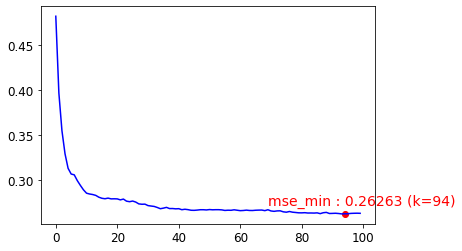

In [52]:
x=np.linspace(0,99,100)
plt.plot(mse_min_k, mse_min, "ro")
plt.text(mse_min_k-25, mse_min+0.01, r"mse_min : "+str(round(mse_min,5))+" (k="+str(mse_min_k)+")", fontsize=14, color="r")
plt.plot(x,mse, "b")

그림 저장: scatterplot


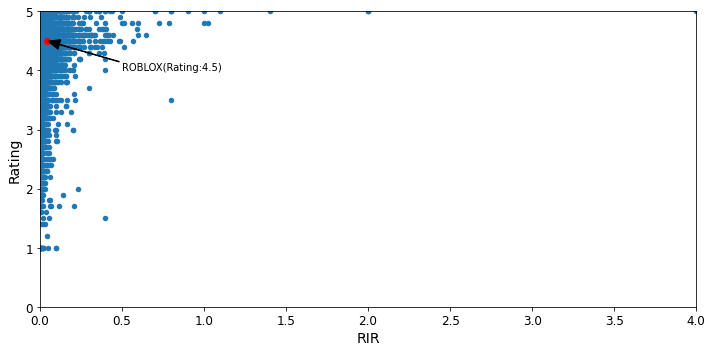

In [53]:
apps.plot(kind='scatter', x="RIR", y='Rating', figsize=(10,5))
plt.axis([0, 4, 0, 5])
position_text = {
    "ROBLOX(Rating:4.5)": (0.5, 4.),
}
for app, pos_text in position_text.items():
    pos_data_x, pos_data_y = apps.loc[apps["App"] == "ROBLOX",["RIR","Rating"]].iloc[0]
    plt.annotate(app, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.01, headwidth=10))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("RIR")
save_fig('scatterplot')
plt.show()

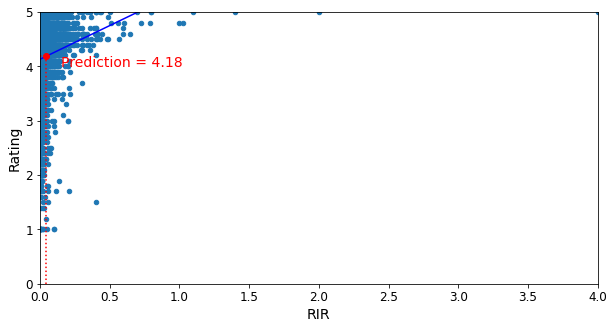

In [54]:
Xr = np.c_[strat_train_set["RIR"]]
yr = np.c_[strat_train_set["Rating"]]

# Visualize the data
strat_train_set.plot(kind='scatter', x="RIR", y='Rating', figsize=(10,5))
plt.axis([0, 4, 0, 5])

# Select a linear model
modelr = linear_model.LinearRegression()

# Train the model
modelr.fit(Xr, yr)

tr0, tr1 = modelr.intercept_[0], modelr.coef_[0][0]

liner=np.linspace(0, 4, 1000)
plt.plot(liner, tr0 + tr1*liner, "b")

# Make a prediction
xr_test, rating = apps.loc[apps["App"] == "ROBLOX",["RIR","Rating"]].iloc[0]

Xr_test = [[xr_test]]
Yr_test = modelr.predict(Xr_test)
yr_test = modelr.predict(Xr_test)[0][0]
plt.plot(Xr_test, Yr_test, "ro")
plt.plot([xr_test, xr_test],[0, yr_test], "r:")
plt.plot([0, xr_test],[yr_test, yr_test], "r:")
plt.text(0.15, 4., r"Prediction = "+str(round(yr_test,2)), fontsize=14, color="r")
plt.show()

In [55]:
y_predictr = modelr.predict(np.array(apps_test["RIR"]).reshape(-1,1))
y_predictr = y_predictr.reshape(len(y_predictr))
y_answerr = np.array(apps_test["Rating"])
print("Evaluate(MSE) : {}".format(np.average((y_predictr-y_answerr)**2)))

Evaluate(MSE) : 0.27125116694307694


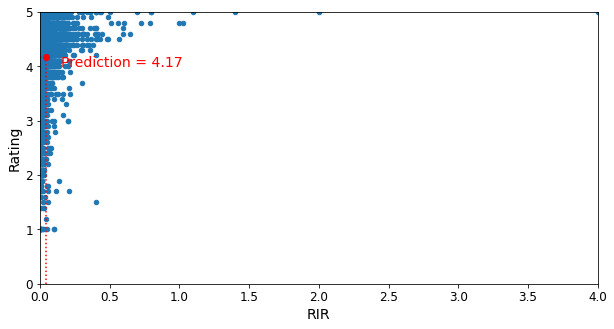

In [56]:
modelkr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=50)

Xkr = np.c_[strat_train_set["RIR"]]
ykr = np.c_[strat_train_set["Rating"]]

strat_train_set.plot(kind='scatter', x="RIR", y='Rating', figsize=(10,5))
plt.axis([0, 4, 0, 5])

modelkr.fit(Xkr, ykr)

xkr, rating = apps.loc[apps["App"] == "ROBLOX",["RIR","Rating"]].iloc[0]

ykr = modelkr.predict([[xkr]])
yykr = modelkr.predict([[xkr]])[0][0]
plt.plot(xkr, ykr, "ro")
plt.plot([xkr, xkr],[0, yykr], "r:")
plt.plot([0, xkr],[yykr, yykr], "r:")
plt.text(0.15, 4., r"Prediction = "+str(round(yykr,2)), fontsize=14, color="r")
plt.show()

In [57]:
y_predictkr = modelkr.predict(np.array(apps_test["RIR"]).reshape(-1,1))
y_predictkr = y_predictkr.reshape(len(y_predictkr))
y_answerkr = np.array(apps_test["Rating"])
print("Evaluate(MSE) : {}".format(np.average((y_predictkr-y_answerkr)**2)))

Evaluate(MSE) : 0.2571633724053724


In [58]:
neigh_num = 0
mse = []
mse_min = 1
mse_min_k = 0

for i in range(0,100):
    neigh_num = i + 1
    modelkr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=neigh_num)
    Xkr = np.c_[strat_train_set["RIR"]]
    ykr = np.c_[strat_train_set["Rating"]]
    modelkr.fit(Xkr, ykr)
    y_predictkr = modelkr.predict(np.array(apps_test["RIR"]).reshape(-1,1))
    y_predictkr = y_predictkr.reshape(len(y_predictkr))
    y_answerkr = np.array(apps_test["Rating"])
    mse_value = np.average((y_predictkr-y_answerkr)**2)
    mse.append(mse_value)
    if mse_min > mse_value :
        mse_min = mse_value
        mse_min_k = neigh_num

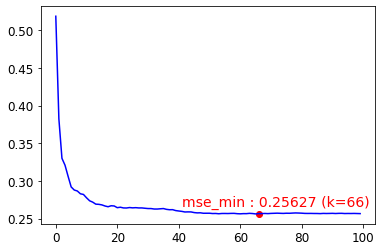

In [59]:
x=np.linspace(0,99,100)
plt.plot(mse_min_k, mse_min, "ro")
plt.text(mse_min_k-25, mse_min+0.01, r"mse_min : "+str(round(mse_min,5))+" (k="+str(mse_min_k)+")", fontsize=14, color="r")
plt.plot(x,mse, "b")

In [60]:
print("MSE Comparison : Reviews vs RIR, Linear Regression vs KNN")
df = pd.DataFrame({"Reviews(①)" : [0.27943, 0.26263],
                  "RIR(②)" : [0.27125, 0.25627],
                  "(②-①)" : [0.27125-0.27943, 0.25627-0.26263]},
                 index = [("Linear Regression"),("KNN")])
df

MSE Comparison : Reviews vs RIR, Linear Regression vs KNN


,Reviews(①),RIR(②),(②-①)
Linear Regression,0.27943,0.27125,-0.00818
KNN,0.26263,0.25627,-0.00636


In [61]:
apps2 = strat_train_set.copy()
apps2.drop("App", axis=1, inplace=True)
apps2.drop("Last Updated", axis=1, inplace=True)
apps2.drop("Current Ver", axis=1, inplace=True)
apps2.drop("Android Ver", axis=1, inplace=True)

In [62]:
dic1 = pd.DataFrame(apps2['Category'].value_counts()/len(apps2)).to_dict()
apps2['Category'] = apps2.apply(lambda apps2 : float(dic1["Category"][apps2.Category]), axis=1)
dic2 = pd.DataFrame(apps2['ContentRating'].value_counts()/len(apps2)).to_dict()
apps2['ContentRating'] = apps2.apply(lambda apps2 : float(dic2['ContentRating'][apps2.ContentRating]), axis=1)
dic3 = pd.DataFrame(apps2['Genres'].value_counts()/len(apps2)).to_dict()
apps2['Genres'] = apps2.apply(lambda apps2 : float(dic3['Genres'][apps2.Genres]), axis=1)
apps2['Type'] = apps2.apply(lambda apps2 : 0 if apps2.Type=='Free' else 1, axis=1)

In [63]:
import sklearn.preprocessing
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

for col_name in apps2:
    apps2[col_name] = min_max_scaler.fit_transform(apps2[col_name].values.reshape(-1,1))

In [64]:
apps2

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,RIR
1421,0.549801,0.900,1.032951e-02,0.093561,9.999999e-03,0.0,0.000000,0.136681,0.262238,0.020182
1809,0.159363,0.750,6.397273e-08,0.001308,9.900000e-08,1.0,0.099975,1.000000,0.407343,0.014998
1475,0.549801,0.875,3.924893e-03,0.029175,9.999999e-03,0.0,0.000000,1.000000,0.034965,0.007667
4156,1.000000,0.800,8.830117e-03,0.025151,9.999999e-03,0.0,0.000000,0.136681,0.120629,0.017252
3309,0.162550,0.750,1.804031e-06,0.006237,9.999000e-06,0.0,0.000000,1.000000,0.414336,0.003548
...,...,...,...,...,...,...,...,...,...,...
6648,1.000000,0.800,2.564654e-03,0.025151,9.999999e-03,0.0,0.000000,1.000000,0.036713,0.005010
1870,0.104382,0.775,1.000000e+00,0.000000,1.000000e+00,0.0,0.000000,0.136681,0.286713,0.019538
7670,0.136255,0.525,6.346095e-06,0.036217,9.999900e-05,0.0,0.000000,1.000000,0.356643,0.001241
6228,1.000000,0.675,8.333088e-05,0.072435,4.999990e-04,0.0,0.000000,1.000000,0.262238,0.003255


In [67]:
train_input=np.array(apps2.drop("Rating", axis=1))
train_output=np.array(apps2.Rating)

In [69]:
from keras.models import Sequential
from keras.layers import Dense

def mlp(n_obs, n_action, n_hidden_layer=1, n_neuron_per_layer=32,
        activation='relu', loss='mse'):
    model = Sequential()
    model.add(Dense(n_neuron_per_layer, input_dim=n_obs[1], activation=activation))
    for _ in range(n_hidden_layer):
        model.add(Dense(n_neuron_per_layer, activation=activation))
    model.add(Dense(n_action, activation='linear'))
    model.compile(loss=loss, optimizer='adam')
    return model

model = mlp(np.array(train_input).shape, 1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [70]:
hist = model.fit(train_input, train_output, epochs=500, batch_size=100)

Epoch 1/500
66/66 [==============================] - 14s 2ms/step - loss: 0.2875
Epoch 2/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 3/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 4/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 5/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 6/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 8/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 9/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 10/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 11/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 12/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 13/500
66/66 [================

66/66 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 203/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 204/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 205/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 206/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 207/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 208/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 209/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 210/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 211/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 212/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 213/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 214/500
66/66 [=========

66/66 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 303/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 304/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 305/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 306/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 307/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 308/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 309/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 310/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 311/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 312/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 313/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 314/500
66/66 [=========

66/66 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 403/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 404/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 405/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 406/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 407/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 408/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 409/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 410/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 411/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 412/500
66/66 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 413/500
66/66 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 414/500
66/66 [=========